<a href="https://colab.research.google.com/github/eduardax/data-mining-notebooks/blob/main/DM_Microdados3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive', True)

Mounted at /content/drive


In [ ]:
# Lendo uma base de dados no formato .csv.
arquivo = '/content/drive/MyDrive/Colab Notebooks/athlete_events.csv'
dataset = pd.read_csv(arquivo, sep=',', header=0)

print('Base carregada com sucesso \o/')

Base carregada com sucesso \o/


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

**Data Dictionary - Jogos Olímpcios:**
* ID = ID do atleta
* Name = Nome do atleta
* Sex = Gênero do atleta (0 -> F | 1 -> M)
* Age = Idade do atleta
* Height = Altura do atleta
* Weight = Peso do atleta
* Team = País que representa
* Year = Ano do evento
* Season = Temporada do evento olímpico
* City = Cidade que o evento aconteceu
* Sport = Esporte praticado pelo atleta
* Event = Evento olímpico
* Medal = Medalha que o atleta recebeu



Removendo colunas indesejadas

In [ ]:
# Lista de colunas indesejadas que não serão úteis para a classificação
colunas_indesejadas = ['ID', 'Name', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City','Event']
print(f'Removendo as colunas indesejadas: {colunas_indesejadas}')

print(f'Dataset antes da remoção das colunas: {dataset.shape[0]} linhas e {dataset.shape[1]} colunas')

# Removendo as colunas indesejadas
dataset_novo = dataset

dataset = dataset.drop(labels=colunas_indesejadas, axis=1)

print(f'Dataset após a remoção das colunas: {dataset.shape[0]} linhas e {dataset.shape[1]} colunas\n')
dataset.head()

Removendo as colunas indesejadas: ['ID', 'Name', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Event']
Dataset antes da remoção das colunas: 271116 linhas e 15 colunas
Dataset após a remoção das colunas: 271116 linhas e 6 colunas



,Sex,Age,Height,Weight,Sport,Medal
0,M,24.0,180.0,80.0,Basketball,NaN
1,M,23.0,170.0,60.0,Judo,NaN
2,M,24.0,NaN,NaN,Football,NaN
3,M,34.0,NaN,NaN,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Speed Skating,NaN


Removendo linhas com valores vazios (NaN)

In [ ]:
print('Número de linhas vazias para cada coluna (NaN):')
dataset.isna().sum()

Número de linhas vazias para cada coluna (NaN):


Sex            0
Age         9474
Height     60171
Weight     62875
Sport          0
Medal     231333
dtype: int64

## Exercício
Baseado na coluna "Sex" alterne o pré-processo para preencher a coluna "Age" quando for vazia (NaN) com a média da idade pelo sexo.

In [ ]:
print("Total de mulheres: ",(dataset['Sex']=="F").sum())
print("Total de homens: ",(dataset['Sex']=="M").sum())

Total de mulheres:  74522
Total de homens:  196594


In [ ]:
# Usando o 'loc' para localizar as linhas através de um filtro,
# e selecionar uma coluna específica da coluna e atribuir um novo valor para ela.
dataset.loc[dataset['Sex'] == 'F', 'Sex'] = 0
dataset.loc[dataset['Sex'] == 'M', 'Sex'] = 1

#Verificando o index para a coluna do Sex = F
sex_f = dataset[dataset["Sex"]==0].index
#Verificando o index para a coluna do Sex = M
sex_m = dataset[dataset["Sex"]==1].index

#Usando 'drop' para excluir linhas no Sex = M e 'setando' o dataset feminino
sex_folks_f = dataset.drop(sex_m)
#Usando 'drop' para excluir linhas Sex = F e 'setando' o dataset maculino
sex_folks_m = dataset.drop(sex_f)

print("The female dataset is:")
print(sex_folks_f.head())

print("\n\n\nThe male dataset is:")
print(sex_folks_m.head())

dataset_F = sex_folks_f
dataset_M = sex_folks_m


The female dataset is:
  Sex   Age  Height  Weight          Sport Medal
4   0  21.0   185.0    82.0  Speed Skating   NaN
5   0  21.0   185.0    82.0  Speed Skating   NaN
6   0  25.0   185.0    82.0  Speed Skating   NaN
7   0  25.0   185.0    82.0  Speed Skating   NaN
8   0  27.0   185.0    82.0  Speed Skating   NaN



The male dataset is:
   Sex   Age  Height  Weight                 Sport Medal
0    1  24.0   180.0    80.0            Basketball   NaN
1    1  23.0   170.0    60.0                  Judo   NaN
2    1  24.0     NaN     NaN              Football   NaN
3    1  34.0     NaN     NaN            Tug-Of-War  Gold
10   1  31.0   188.0    75.0  Cross Country Skiing   NaN


In [ ]:
#Tirando a média da idade do sexo Feminino
mean_age_f = dataset_F['Age'].mean()
print("Age female:", mean_age_f)

#Tirando a média da idade do sexo Masculino
mean_age_m = dataset_M['Age'].mean()
print("\nAge male:", mean_age_m)


Age female: 23.732880779508218

Age male: 26.277561532227104


In [ ]:
#Substituindo os NaN pela média da idade do sexo Feminino
dataset_F['Age'].fillna(value=dataset_F['Age'].mean(), inplace=True)

dataset_F.head()


,Sex,Age,Height,Weight,Sport,Medal
4,0,21.0,185.0,82.0,Speed Skating,NaN
5,0,21.0,185.0,82.0,Speed Skating,NaN
6,0,25.0,185.0,82.0,Speed Skating,NaN
7,0,25.0,185.0,82.0,Speed Skating,NaN
8,0,27.0,185.0,82.0,Speed Skating,NaN


In [ ]:
#Verificando se coluna Age contém campos nulos
dataset_F.isna().sum()

Sex           0
Age           0
Height     7144
Weight     7751
Sport         0
Medal     63269
dtype: int64

In [ ]:
#Substituindo os NaN pela média da idade do sexo Masculino
dataset_M['Age'].fillna(value=dataset_M['Age'].mean(), inplace=True)

dataset_M.head()

,Sex,Age,Height,Weight,Sport,Medal
0,1,24.0,180.0,80.0,Basketball,NaN
1,1,23.0,170.0,60.0,Judo,NaN
2,1,24.0,NaN,NaN,Football,NaN
3,1,34.0,NaN,NaN,Tug-Of-War,Gold
10,1,31.0,188.0,75.0,Cross Country Skiing,NaN


In [ ]:
dataset_F = dataset_F.dropna(subset=['Height', 'Weight'])
dataset_M = dataset_M.dropna(subset=['Height', 'Weight'])

In [ ]:
values = {"Medal": 0}
dataset_F = dataset_F.fillna(value=values)
values = {"Medal": 0}
dataset_M = dataset_M.fillna(value=values)

In [ ]:
dataset_M.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
Sport     0
Medal     0
dtype: int64

In [ ]:
dataset_Male = dataset_M.drop(labels='Sex', axis=1)
dataset_Female = dataset_F.drop(labels='Sex', axis=1)

In [ ]:
dataset_Male

,Age,Height,Weight,Sport,Medal
0,24.0,180.0,80.0,Basketball,0
1,23.0,170.0,60.0,Judo,0
10,31.0,188.0,75.0,Cross Country Skiing,0
11,31.0,188.0,75.0,Cross Country Skiing,0
12,31.0,188.0,75.0,Cross Country Skiing,0
...,...,...,...,...,...
271111,29.0,179.0,89.0,Luge,0
271112,27.0,176.0,59.0,Ski Jumping,0
271113,27.0,176.0,59.0,Ski Jumping,0
271114,30.0,185.0,96.0,Bobsleigh,0


In [ ]:
# Usando o 'loc' para localizar as linhas através de um filtro,
# e selecionar uma coluna específica da coluna e atribuir um novo valor para ela.
dataset_Female.loc[dataset_Female['Medal'] == 'Gold', 'Medal'] = 1
dataset_Female.loc[dataset_Female['Medal'] == 'Silver', 'Medal'] = 1
dataset_Female.loc[dataset_Female['Medal'] == 'Bronze', 'Medal'] = 1

dataset_Female

,Age,Height,Weight,Sport,Medal
4,21.0,185.0,82.0,Speed Skating,0
5,21.0,185.0,82.0,Speed Skating,0
6,25.0,185.0,82.0,Speed Skating,0
7,25.0,185.0,82.0,Speed Skating,0
8,27.0,185.0,82.0,Speed Skating,0
...,...,...,...,...,...
271080,33.0,168.0,80.0,Athletics,1
271099,36.0,171.0,63.0,Wrestling,0
271102,19.0,171.0,64.0,Athletics,1
271103,23.0,171.0,64.0,Athletics,1


In [ ]:
# Usando o 'loc' para localizar as linhas através de um filtro,
# e selecionar uma coluna específica da coluna e atribuir um novo valor para ela.
dataset_Male.loc[dataset_Male['Medal'] == 'Gold', 'Medal'] = 1
dataset_Male.loc[dataset_Male['Medal'] == 'Silver', 'Medal'] = 1
dataset_Male.loc[dataset_Male['Medal'] == 'Bronze', 'Medal'] = 1

dataset_Male

,Age,Height,Weight,Sport,Medal
0,24.0,180.0,80.0,Basketball,0
1,23.0,170.0,60.0,Judo,0
10,31.0,188.0,75.0,Cross Country Skiing,0
11,31.0,188.0,75.0,Cross Country Skiing,0
12,31.0,188.0,75.0,Cross Country Skiing,0
...,...,...,...,...,...
271111,29.0,179.0,89.0,Luge,0
271112,27.0,176.0,59.0,Ski Jumping,0
271113,27.0,176.0,59.0,Ski Jumping,0
271114,30.0,185.0,96.0,Bobsleigh,0


In [ ]:
dataset_Female['Medal'].value_counts()

0    56379
1    10350
Name: Medal, dtype: int64

In [ ]:
dataset_Male['Medal'].value_counts()

0    120278
1     19846
Name: Medal, dtype: int64

In [ ]:
dataset_Male['Sport'].value_counts()

Athletics                    21576
Gymnastics                   10749
Swimming                     10336
Cycling                       6481
Rowing                        5671
Shooting                      5634
Wrestling                     4943
Fencing                       4766
Cross Country Skiing          4449
Boxing                        4366
Canoeing                      4270
Sailing                       3997
Ice Hockey                    3825
Alpine Skiing                 3736
Football                      3548
Equestrianism                 3400
Hockey                        2874
Biathlon                      2808
Weightlifting                 2541
Basketball                    2468
Speed Skating                 2464
Judo                          2387
Water Polo                    2236
Bobsleigh                     2063
Handball                      2052
Ski Jumping                   1942
Volleyball                    1782
Modern Pentathlon             1097
Nordic Combined     

In [ ]:
dataset_Female_Athletics = dataset_Female.loc[dataset_Female['Sport'] == 'Athletics']

dataset_Female_Athletics

,Age,Height,Weight,Sport,Medal
135,24.0,168.0,65.0,Athletics,0
136,28.0,168.0,65.0,Athletics,0
163,22.0,179.0,80.0,Athletics,1
164,26.0,179.0,80.0,Athletics,0
193,25.0,168.0,105.0,Athletics,0
...,...,...,...,...,...
271078,25.0,168.0,80.0,Athletics,1
271079,29.0,168.0,80.0,Athletics,0
271080,33.0,168.0,80.0,Athletics,1
271102,19.0,171.0,64.0,Athletics,1


In [ ]:
dataset_Male_Athletics = dataset_Male.loc[dataset_Male['Sport'] == 'Athletics']

dataset_Male_Athletics

,Age,Height,Weight,Sport,Medal
57,31.0,189.0,130.0,Athletics,0
94,24.0,174.0,70.0,Athletics,0
98,30.0,187.0,76.0,Athletics,0
130,22.0,177.0,74.0,Athletics,0
131,22.0,177.0,74.0,Athletics,0
...,...,...,...,...,...
270959,23.0,190.0,80.0,Athletics,0
271025,27.0,170.0,63.0,Athletics,0
271044,25.0,175.0,64.0,Athletics,0
271045,21.0,175.0,70.0,Athletics,0


In [ ]:
dataset_Female_Athletics['Medal'].value_counts()

0    9753
1    1239
Name: Medal, dtype: int64

In [ ]:
dataset_Male_Athletics['Medal'].value_counts()

0    19162
1     2414
Name: Medal, dtype: int64

In [ ]:
(dataset_Female_Athletics[['Medal']] == 0).sample(1239)

,Medal
12208,True
83407,True
181115,True
83924,True
10146,False
...,...
126344,True
187844,True
200322,False
138599,True


Random under-sampling:
0    1239
1    1239
Name: Medal, dtype: int64


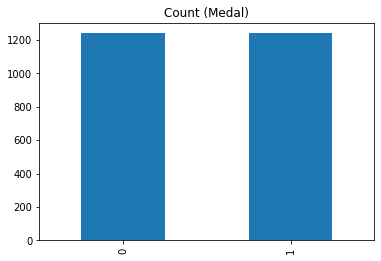

In [ ]:
    import matplotlib
    %matplotlib inline
    # Class count
    count_class_0, count_class_1 = dataset_Female_Athletics.Medal.value_counts()

    # Divide by class
    df_class_0 = dataset_Female_Athletics[dataset_Female_Athletics['Medal'] == 0]
    df_class_1 = dataset_Female_Athletics[dataset_Female_Athletics['Medal'] == 1]

    #UNDER SAMPLING
    df_class_0_under = df_class_0.sample(count_class_1)
    df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

    print('Random under-sampling:')
    print(df_test_under.Medal.value_counts())

    df_test_under.Medal.value_counts().plot(kind='bar', title='Count (Medal)');

Random under-sampling:
0    2414
1    2414
Name: Medal, dtype: int64


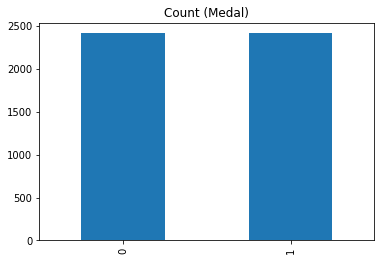

In [ ]:
    # Class count
    count_class_0, count_class_1 = dataset_Male_Athletics.Medal.value_counts()

    # Divide by class
    df_class_0 = dataset_Male_Athletics[dataset_Male_Athletics['Medal'] == 0]
    df_class_1 = dataset_Male_Athletics[dataset_Male_Athletics['Medal'] == 1]

    #UNDER SAMPLING
    df_class_0_under = df_class_0.sample(count_class_1)
    df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

    print('Random under-sampling:')
    print(df_test_under.Medal.value_counts())

    df_test_under.Medal.value_counts().plot(kind='bar', title='Count (Medal)');

In [ ]:
#FENALE
# Importando o MatplotLib para auxiliar dos plots
import matplotlib.pyplot as plt

# Importações para separar o dataset em treinamento e teste
import numpy as np
from sklearn.model_selection import train_test_split

# Importações para exibir as métricas dos modelos
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Importação para realizar o plot das árvores
from sklearn import tree

# Convertendo o dataset em arrays Numpy
# X conterá todas as colunas, exceto a coluna alvo (Survived)
X = np.array(dataset_Female_Athletics.drop(labels='Medal', axis=1))
# y conterá apenas a coluna alvo (Survived)
y = np.array(dataset_Female_Athletics['Medal'])

print('Amostra de 3 linhas:')
print(f'X = {X[0:3]}')
print(f'y = {y[0:3]}\n')

# Fazendo a separação da base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Dataset de treinamento: {len(X_train)} linhas')
print(f'Dataset de teste: {len(X_test)} linhas')

Amostra de 3 linhas:
X = [[24.0 168.0 65.0 'Athletics']
 [28.0 168.0 65.0 'Athletics']
 [22.0 179.0 80.0 'Athletics']]
y = [0 0 1]

Dataset de treinamento: 7694 linhas
Dataset de teste: 3298 linhas


In [ ]:
#MALE
# Importando o MatplotLib para auxiliar dos plots
import matplotlib.pyplot as plt

# Importações para separar o dataset em treinamento e teste
import numpy as np
from sklearn.model_selection import train_test_split

# Importações para exibir as métricas dos modelos
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Importação para realizar o plot das árvores
from sklearn import tree

# Convertendo o dataset em arrays Numpy
# X conterá todas as colunas, exceto a coluna alvo (Survived)
X = np.array(dataset_Male_Athletics.drop(labels='Medal', axis=1))
# y conterá apenas a coluna alvo (Survived)
y = np.array(dataset_Male_Athletics['Medal'])

print('Amostra de 3 linhas:')
print(f'X = {X[0:3]}')
print(f'y = {y[0:3]}\n')

# Fazendo a separação da base em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Dataset de treinamento: {len(X_train)} linhas')
print(f'Dataset de teste: {len(X_test)} linhas')

Amostra de 3 linhas:
X = [[31.0 189.0 130.0 'Athletics']
 [24.0 174.0 70.0 'Athletics']
 [30.0 187.0 76.0 'Athletics']]
y = [0 0 0]

Dataset de treinamento: 15103 linhas
Dataset de teste: 6473 linhas
